In [1]:
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import json 
import numpy as np
import copy
import os
import pickle
import matplotlib.pyplot as plt
from PIL import Image

# Get all the matches between classes and colors 

In [3]:
def get_color_classes():
    """
    Retourne un tableau de couleurs représentant chaque classe.

    Returns:
        np.array: Tableau de couleurs sous forme de valeurs RGB pour chaque classe.
    """
    colors = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [111, 74, 0], [81, 0, 81], [128, 64, 128], [244, 35, 232], [250, 170, 160], [230, 150, 140], [70, 70, 70], [102, 102, 156], [190, 153, 153], [180, 165, 180], [150, 100, 100], [150, 120, 90], [153, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 0, 90], [0, 0, 110], [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 142]] 
    return   np.array(colors)
colors = get_color_classes()

In [4]:
def show_classes_with_colors():
    """
    Affiche une grille des classes et de leurs couleurs correspondantes.

    Args:
        None

    Returns:
        None: La fonction affiche directement les classes et leurs couleurs sous forme de grille.
    """
    cols=9
    rows=4
    colors = get_color_classes()
    fig, ax = plt.subplots(rows, cols, figsize=(20, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    labels=["unlabeled",'ego vehicle', 'rectification border', 'out of roi' , 'static' , 'dynamic'  , 'ground' ,  'road', 'sidewalk',
    'parking', 'rail track' , 'building', 'wall' ,  'fence'       , 'guard rail',  'bridge', 'tunnel' , 'pole', 'polegroup', 
    'traffic light',  'traffic sign' , 'vegetation', 'terrain' , 'sky', 'person'  , 'rider',  'car', 'truck', 'bus' ,  'caravan', 'trailer', 'train', 'motorcycle',
    'bicycle'  , 'license plate']
    for i, color in enumerate(colors):
        
        row = i // cols
        col = i % cols
        ax[row, col].imshow([[(color[0], color[1],color[2])]], extent=[0, 1, 0, 1], origin='lower', aspect='auto')
        ax[row, col].set_title(f' {i}-{labels[i]}')
        ax[row, col].axis('off')

    plt.suptitle('Classes and colors', fontsize=16)
    plt.show()

In [5]:
def plot_evolution_In_out_vocab(path_folder_results, all_classes=False, test_INvocab=True):
    """
    Trace l'évolution des métriques PQ pour les classes "All", "Things", et "Stuff", ainsi que pour les vocabulaires "In" et "Out".

    Args:
        path_folder_results (str): Chemin vers le dossier contenant les résultats.
        all_classes (bool): Si True, trace l'évolution pour chaque classe individuelle. Par défaut False.

    Returns:
        None: La fonction affiche directement les graphiques.
    """

    with open(os.path.join(path_folder_results,'log.txt'), 'r') as file:
        # Read the entire contents of the file
        plots_results = file.read()
    lis_plot=plots_results.split("|        |   PQ   |   SQ   |   RQ   |  #categories  |")
    
    if test_INvocab:
         with open(os.path.join("/tsi/hi-paris/FCCLIP_results/Results_with_images/Inference/inferece_results/fcclip_cocopan_r50_000_000",'log.txt'), 'r') as file:
            # Read the entire contents of the file
            inferences_logs = file.read()
         list_nferences_logs=inferences_logs.split("|        |   PQ   |   SQ   |   RQ   |  #categories  |") 
         out_vocab_inference=[float(i.split('|')[2]) for i in list_nferences_logs[1].split("\n")[8:27][-8:]]
         test_INvocab=True



    in_vocab_all=[]
    out_vocab_all=[]

    all=[]
    Things=[]
    Stuff=[]

    for m in range(1,len(lis_plot)):
        results_run=lis_plot[m].split("\n")
        results_val=[]


        all.append(float(results_run[2].split("|")[2])) 
        Things.append(float(results_run[3].split("|")[2])) 
        Stuff.append(float(results_run[4].split("|")[2])) 

        
        for i in results_run[8:27]:
            list_val=i.split("|")
            results_val.append(float(list_val[2]))
        
        in_vocab=results_val[:-8]
        out_vocab=results_val[-8:]
        if not all_classes:
            in_vocab_all.append(sum(in_vocab)/len(in_vocab))
            if test_INvocab:
                out_vocab_all.append(sum(out_vocab_inference)/len(out_vocab_inference)) 
            else:
                out_vocab_all.append(sum(out_vocab)/len(out_vocab))
        else:
            in_vocab_all.append(in_vocab)
            if test_INvocab:
                out_vocab_all.append(out_vocab_inference) 
            else:
                out_vocab_all.append(out_vocab)
    plt.figure(figsize=(10, 5))
    if test_INvocab:
         print(out_vocab_inference)
         print(Stuff)
         out_ll=sum(out_vocab_inference)/8

         all = [(i*11 + out_ll*8)/19 for i in Stuff] 
         Things=[out_ll for i in range(len(Stuff))]
    plt.plot(all, marker='o', linestyle='-', color='r', label="all")
    plt.plot(Things, marker='o', linestyle='-', color='b', label="Things")
    plt.plot(Stuff, marker='o', linestyle='-', color='g', label="Stuff")
    plt.title('PQ evolution for All, Things and Stuff')
    plt.xlabel('Iter')
    plt.ylabel('PQ')
    plt.grid(True)
    plt.legend()
    plt.show()
    if not all_classes:
        plt.figure(figsize=(10, 5))
        plt.plot(in_vocab_all, marker='o', linestyle='-', color='r', label="IN vocab")
        plt.plot(out_vocab_all, marker='x', linestyle='-', color='b', label="OUT vocab")
        plt.title('PQ evolution for In and Out vocab')
        plt.xlabel('Iter')
        plt.ylabel('PQ')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        out_vocab_all=np.array(out_vocab_all).T
        in_vocab_all=np.array(in_vocab_all).T
        classes=[7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
        colors=get_color_classes()
        plt.figure(figsize=(15, 10))
        for k in range(len(in_vocab_all)):
                plt.plot(in_vocab_all[k], marker='o', linestyle='-', label=f"IN vocab classe {classes[k]}", color=tuple(c / 255.0 for c in colors[k])  )
        for k in range(len(out_vocab_all)):
                plt.plot(out_vocab_all[k], marker='x', linestyle='-', label=f"OUT vocab classe {classes[k+len(in_vocab_all)]}")
        plt.title('PQ evolution for each classe')
        plt.xlabel('Iter')
        plt.ylabel('PQ')
        plt.grid(True)
        plt.legend()
        plt.show()


In [7]:
def get_all_names_of_images(path_folder_results):
    """
    Affiche tous les noms d'images présents dans un dossier spécifique.

    Args:
        path_folder_results (str): Chemin du dossier contenant les résultats.

    Returns:
        None: Cette fonction affiche directement les noms des fichiers d'image.
    """
    path_images=os.path.join(path_folder_results,'images/image_iter_0')
    for  i in os.listdir(path_images):
        print(i)
path_folder_results="/tsi/hi-paris/FCCLIP_results/Results_with_images/Full_finetuning/train_results/fcclip_cocopan_r50_000_100"
#path_folder_results="//tsi/hi-paris/FCCLIP_results/Results_with_images/INvocab/train_results/fcclip_cocopan_r50_008_100"
get_all_names_of_images(path_folder_results)

munster_000142_000019_leftImg8bit.png
munster_000039_000019_leftImg8bit.png
frankfurt_000001_052120_leftImg8bit.png
munster_000066_000019_leftImg8bit.png
munster_000166_000019_leftImg8bit.png
frankfurt_000001_023235_leftImg8bit.png
munster_000016_000019_leftImg8bit.png
frankfurt_000001_058914_leftImg8bit.png
frankfurt_000001_073464_leftImg8bit.png
frankfurt_000001_029086_leftImg8bit.png
munster_000081_000019_leftImg8bit.png
frankfurt_000001_051516_leftImg8bit.png
munster_000156_000019_leftImg8bit.png
munster_000113_000019_leftImg8bit.png
frankfurt_000001_049078_leftImg8bit.png
munster_000036_000019_leftImg8bit.png
munster_000042_000019_leftImg8bit.png
munster_000104_000019_leftImg8bit.png
lindau_000027_000019_leftImg8bit.png
lindau_000045_000019_leftImg8bit.png
munster_000150_000019_leftImg8bit.png
munster_000049_000019_leftImg8bit.png
frankfurt_000001_075296_leftImg8bit.png
frankfurt_000001_066438_leftImg8bit.png
munster_000031_000019_leftImg8bit.png
frankfurt_000001_078803_leftImg8bi

In [8]:
classes=[7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
len(classes)

19

In [9]:
classes[:-8]

[7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23]

In [10]:
def update_image(image, colors, value_dict, matcher_out):
    """
    Met à jour une image prédite avec les couleurs correspondantes aux vraies classes.

    Args:
        image (list): Image prédite représentée sous forme de liste 3D où chaque élément est une sous-liste contenant des labels de sortie.
        colors (dict): Dictionnaire associant chaque classe à une couleur (sous forme de liste de 3 valeurs [R, G, B]).
        value_dict (dict): Dictionnaire de correspondance entre les labels de sortie et les vrais labels.

    Returns:
        list: Nouvelle image avec les couleurs mises à jour en fonction des vraies classes.
    """
    new_image= [[[value_dict[sublist[0]] if sublist[0] in value_dict else 0 , 0,0] for sublist in subarray] for subarray in image]
    for i in new_image:
        for j in i:
            lab=j[0]
            for k in range(3):
                j[k]=colors[lab][k]

    return new_image

def get_matcher(data_for_matcher, index):
    """
    Crée un dictionnaire de correspondance entre les vrais labels et les labels de sortie.

    Args:
        data_for_matcher (dict): Dictionnaire contenant le nombre d'intersections entre les classes.
        index (int): Index spécifiant la clé dans data_for_matcher à utiliser pour obtenir les données d'intersection.

    Returns:
        dict: Dictionnaire de correspondance entre les labels de sortie (clés) et les vrais labels (valeurs).
    """
    max_per_y = {}
    matcher={}
    data_=data_for_matcher[index] 
    for (x, y), value in data_.items():
        if y not in max_per_y or value > max_per_y[y][1]:
            max_per_y[y] = (x, value)
            if len(str(x))>3:
                matcher[int(y)]=int(str(x)[:2])
            else:
                matcher[int(y)]=int(x)
    return matcher

In [11]:
path_results="/tsi/hi-paris/FCCLIP_results/Results_with_images/Naive_with_types_of_results/train_100/fcclip_cocopan_r50_008_1iter"
name_image="munster_000150_000019_leftImg8bit.png"
ind_image=0
with open("/tsi/hi-paris//cityscapes/gtFine/cityscapes_panoptic_val.json", 'r') as file:
    data = json.load(file) 
ind_sementic=-1
for i in range(len(data["annotations"])): 
    if data["annotations"][i]["image_id"] in name_image: 
        ind_sementic=i 

In [12]:
iteration=0

# Matcher for Invocab 
path_found_matcher=os.path.join(path_results,'all', 'all'+str(iteration))
with open(path_found_matcher, 'rb') as file:
    matcher_pickle=pickle.load(file)
matcher=get_matcher(matcher_pickle, ind_sementic)



# Matcher for OutVocab
path_inference="/tsi/hi-paris/FCCLIP_results/Results_with_images/Inference/inferece_results/fcclip_cocopan_r50_000_000"
path_found_matcher_out=os.path.join(path_inference,'all', 'all'+str(iteration))
with open(path_found_matcher_out, 'rb') as file:
    matcher_pickle_out=pickle.load(file)
matcher_out=get_matcher(matcher_pickle_out, ind_sementic)

In [13]:
print(matcher_out)

print(matcher)

{0: 0, 2: 26, 3: 26, 10: 23, 12: 33, 14: 8, 16: 7, 17: 11, 4: 26, 7: 26, 9: 26, 15: 33, 1: 24, 8: 24, 13: 24, 5: 26, 6: 26, 11: 21, 18: 26}
{0: 0, 2: 26, 3: 26, 10: 23, 13: 8, 15: 7, 16: 11, 4: 26, 7: 26, 9: 26, 14: 33, 1: 24, 8: 24, 5: 26, 6: 26, 11: 21, 12: 24, 17: 26}


In [14]:
def matcher_fusion(matcher_in, matcher_out):
    matcher = {k: v for k, v in matcher_in.items() if v <= 23}
    matcher.update({k: v for k, v in matcher_out.items() if v > 23 and k not in matcher})
    return matcher
        


In [15]:
def update_image(image, colors, value_dict, matcher_out):
    
    new_image= [[[value_dict[sublist[0]] if sublist[0] in value_dict else 0 , 0,0] for sublist in subarray] for subarray in image]
    for i in new_image:
        for j in i:
            lab=j[0]
            for k in range(3):
                j[k]=colors[lab][k]

    return new_image

In [16]:
   
path_images=os.path.join(path_results, "images", "image_iter_"+str(iteration)) 
image = np.array(Image.open(os.path.join(path_images, name_image))  , dtype=np.uint32)

predicted_image=update_image(image, colors, matcher,matcher_out) 


In [17]:
def plot_with_name_image(path_results,name_image,iteration, type='infer'):
    """
    Affiche les images originales, prédites, sémantiques et panoptiques pour une itération donnée.

    Args:
        path_results (str): Chemin vers le dossier de résultats.
        name_image (str): Nom de l'image à traiter.
        iteration (int): Numéro de l'itération.
        type (str): Type d'affichage (par défaut 'infer').

    Returns:
        None: La fonction affiche directement les images.
    """


    plt.figure(figsize=(15, 9))
    ind_image=0
    with open("/tsi/hi-paris//cityscapes/gtFine/cityscapes_panoptic_val.json", 'r') as file:
        data = json.load(file) 
    ind_sementic=-1
    for i in range(len(data["annotations"])): 
        if data["annotations"][i]["image_id"] in name_image: 
            ind_sementic=i 
    

    
    # Matcher for Invocab 
    path_found_matcher=os.path.join(path_results,'all', 'all'+str(iteration))
    with open(path_found_matcher, 'rb') as file:
        matcher_pickle=pickle.load(file)
    matcher_in=get_matcher(matcher_pickle, ind_sementic)



    # Matcher for OutVocab
    path_inference="/tsi/hi-paris/FCCLIP_results/Results_with_images/Inference/inferece_results/fcclip_cocopan_r50_000_000"
    path_found_matcher_out=os.path.join(path_inference,'all', 'all0')
    with open(path_found_matcher_out, 'rb') as file:
        matcher_pickle_out=pickle.load(file)
    matcher_out=get_matcher(matcher_pickle_out, ind_sementic)
     
    matcher=  matcher_fusion(matcher_in,matcher_out)
    path_images=os.path.join(path_results, "images", "image_iter_"+str(iteration)) 
    image = np.array(Image.open(os.path.join(path_images, name_image))  , dtype=np.uint32)
    
    predicted_image=update_image(image, colors, matcher,matcher_out) 


    list_name_=name_image.split('_')
    gtFine_color_image=Image.open(os.path.join("/tsi/hi-paris/cityscapes/gtFine/val/", name_image.split('_')[0],list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_color.png'))

    


    panoptic_image_path=os.path.join("/tsi/hi-paris/cityscapes/gtFine/","cityscapes_panoptic_val",list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_panoptic.png')#list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_panoptic.png')
    panoptic_image = Image.open(panoptic_image_path) 
    
    original_image = Image.open(os.path.join("/tsi/hi-paris/cityscapes//leftImg8bit/val/", name_image.split("_")[0],name_image))
    
    plt.subplot(3, 2, ind_image + 1)   
    plt.imshow(predicted_image )
    plt.title("Predicted image")
    plt.axis('off') 
    plt.subplot(3, 2, ind_image + 2)   
    plt.imshow(original_image)
    plt.axis('off')
    plt.title("aoriginal image")  
    plt.subplot(3, 2,  ind_image+ 3)   
    plt.imshow(gtFine_color_image )
    plt.axis('off')  
    plt.title("leftImg8bit image")   
    plt.subplot(3, 2, ind_image + 4)  
    
    
    plt.imshow(panoptic_image)
    plt.title("Panoptic image")  
    plt.axis('off')  

    plt.tight_layout()   
    plt.show() 

In [18]:
#path_folder_results_full_finetuning="/tsi/hi-paris/FCCLIP_results/Results_with_images/Full_finetuning/train_results/fcclip_cocopan_r50_000_100"
#path_folder_results_INvocab="/tsi/hi-paris/FCCLIP_results/Results_with_images/INvocab/train_results/fcclip_cocopan_r50_008_100"
#path_folder_results_Naive="/tsi/hi-paris/FCCLIP_results/Results_with_images/Naive/train_results/fcclip_cocopan_r50_008_100"
#plot_with_name_image(path_folder_results_Naive,"frankfurt_000001_075296_leftImg8bit.png",1, type='infer')

In [19]:
path_folder_results="/tsi/hi-paris/FCCLIP_results/Results_with_images/Naive_with_types_of_results/train_100/fcclip_cocopan_r50_008_1iter"
name_image="munster_000150_000019_leftImg8bit.png"

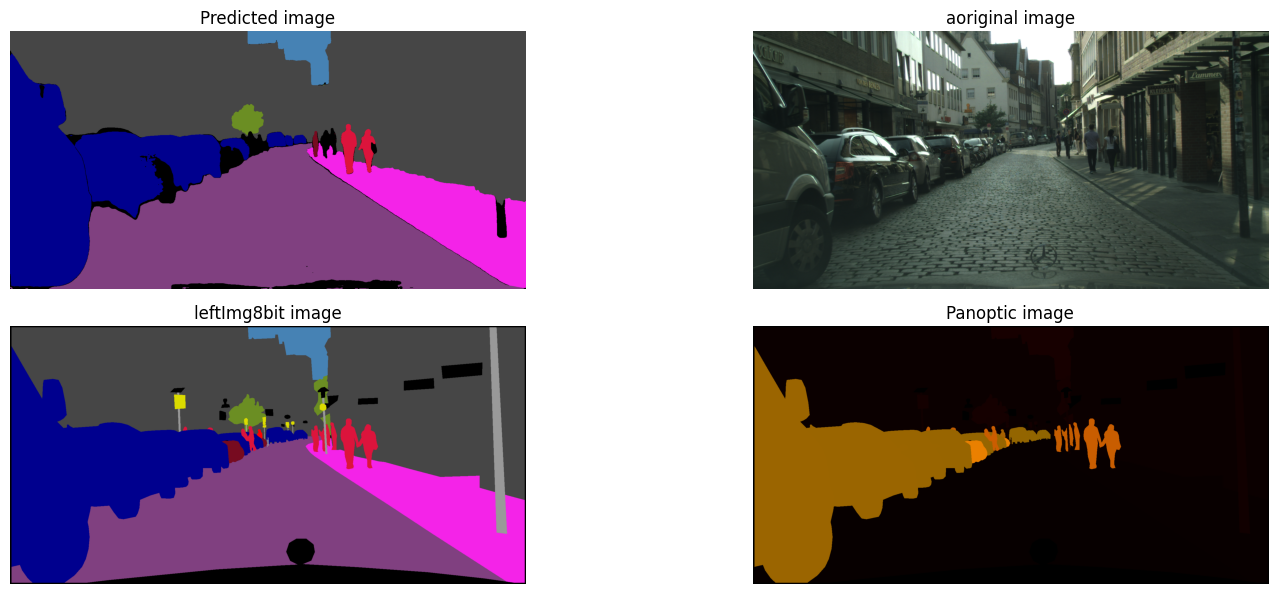

In [20]:
plot_with_name_image(path_folder_results,name_image,0, type='infer')

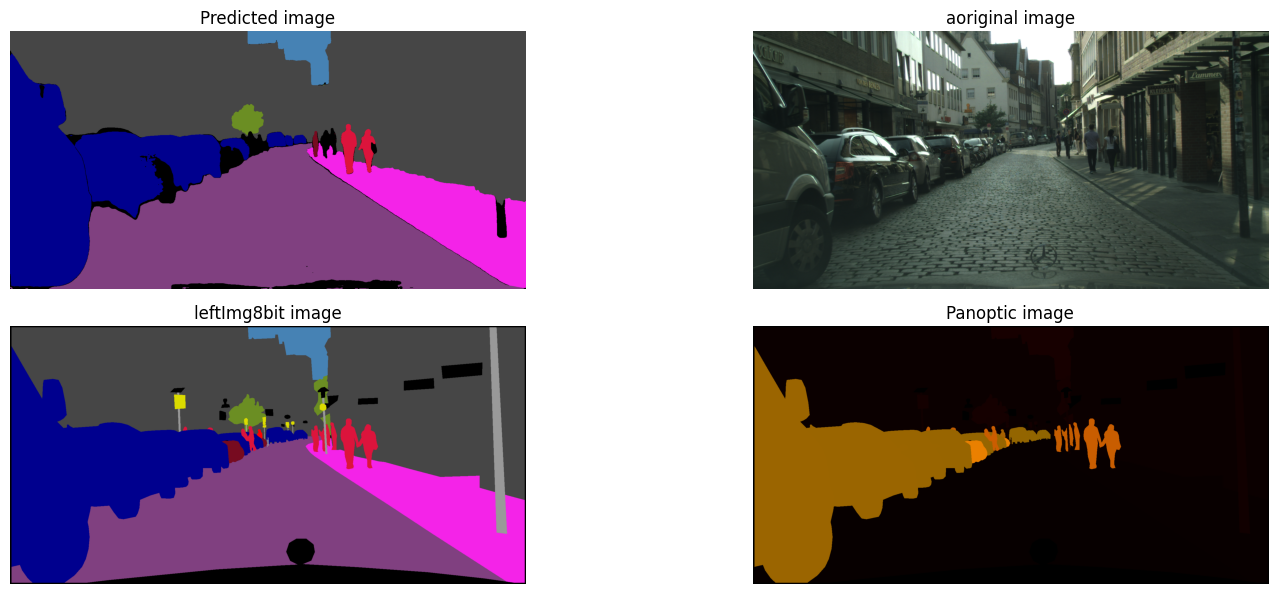

In [21]:
plot_with_name_image(path_folder_results,name_image,0, type='infer')